# **Mission of the bioinformatic tools notebook**

You have just trained, tested, and validated classification and regression models to predict the response of retina phenotypes to the gene expression based on RNA-seq .  Some of your models are promising to predict the phenotype based on their performance.  Now we wish to validate your findings by comparing your results with those obtained from traditional statistical bioinformatic tools.  We also wish to intepret your findings by determining the biological significance of those genes that your models identified.

Your approach is to use various traditional statistical tools that bioinformaticians use when they analyze the same sort of data (gene expression accompanied by a phenotype).  These tools include [DESeq2](https://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html), [gene set enrichment analysis](https://en.wikipedia.org/wiki/Gene_set_enrichment_analysis), and [pathway enrichment analysis](https://en.wikipedia.org/wiki/Pathway_analysis).

# Read in the notebook methods

In [1]:
# install and import the python module for importing a notebook
!pip install import_ipynb
import import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00


In [2]:
# mount your google drive to this notebook
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt", force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at mnt


In [3]:
# import the "Copy of methods.ipynb" from your google drive into this notebook
m = __import__("mnt/MyDrive/Colab Notebooks/Copy of methods")

importing Jupyter notebook from mnt/MyDrive/Colab Notebooks/Copy of methods.ipynb
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 217.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 209.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 153.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 156.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=1fcb561a6f5ef5145db5de91284d753ba116a112e3a0d84f022482336bee29a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-kcu1voko/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/

# Read in and prepare the data

## Read in the data from OSD

In [4]:
# define dictionaries for data and metadata
data=dict()
metadata=dict()

In [5]:
# use m.read_rnaseq_data() to read in the normalized transcriptomic counts from OSD-255
data['255-unnormalized'] = m.read_rnaseq_data('255_rna_seq_RSEM_Unnormalized_Counts')
print('RNA-seq data shape: ', data['255-unnormalized'].shape)
data['255-unnormalized'].head()

RNA-seq data shape:  (56840, 17)


,Unnamed: 0,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
0,ENSMUSG00000000001,226.0,288.0,316.0,252.0,176.0,244.0,291.0,247.0,242.0,256.0,249.0,241.0,188.0,273.0,242.0,288.0
1,ENSMUSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUSG00000000028,24.0,38.0,34.0,29.0,10.0,22.0,29.0,35.0,32.0,42.0,30.0,22.0,19.0,25.0,24.0,44.0
3,ENSMUSG00000000031,9.0,2.0,3.0,27.0,0.0,3.0,7.0,8.0,2.0,7.0,1.0,2.0,3.0,4.0,2.0,1.0
4,ENSMUSG00000000037,10.0,23.0,25.0,29.0,11.0,19.0,12.0,25.0,21.0,15.0,10.0,18.0,6.0,27.0,30.0,21.0


In [6]:
# read in metadata for 255
metadata['255'] = m.read_meta_data('255')
metadata['255'].head()

,Source Name,Sample Name,Characteristics[Organism],Term Source REF,Term Accession Number,Characteristics[Strain],Term Source REF.1,Term Accession Number.1,Characteristics[Animal Source],Characteristics[Sex],...,Parameter Value[absorbed radiation dose rate],Unit.6,Term Source REF.15,Term Accession Number.15,Parameter Value[ionizing radiation],Term Source REF.16,Term Accession Number.16,Parameter Value[ionizing radiation categorized by source],Term Source REF.17,Term Accession Number.17
0,GC9,GSM3932693,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660
1,GC11,GSM3932694,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660
2,GC15,GSM3932695,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660
3,GC16,GSM3932696,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660
4,GC17,GSM3932697,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660


## Filter data

In [7]:
# filter out non-protein coding genes and genes with NaN values
print('shape before filtering: ', data['255-unnormalized'].shape)
rna_seq = m.filter_data(data['255-unnormalized'], dropnans=True, dropgenes='non-coding', droplowcvs=0, droplowcount=10)
print('shape after filtering: ', rna_seq.shape)
rna_seq.head()

shape before filtering:  (56840, 17)
21645
shape after filtering:  (15964, 17)


,Unnamed: 0,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
0,ENSMUSG00000000001,226.0,288.0,316.0,252.0,176.0,244.0,291.0,247.0,242.0,256.0,249.0,241.0,188.0,273.0,242.0,288.0
2,ENSMUSG00000000028,24.0,38.0,34.0,29.0,10.0,22.0,29.0,35.0,32.0,42.0,30.0,22.0,19.0,25.0,24.0,44.0
4,ENSMUSG00000000037,10.0,23.0,25.0,29.0,11.0,19.0,12.0,25.0,21.0,15.0,10.0,18.0,6.0,27.0,30.0,21.0
5,ENSMUSG00000000049,2.0,3.0,1.0,6.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0
6,ENSMUSG00000000056,459.0,623.0,724.0,605.0,509.0,637.0,672.0,581.0,593.0,604.0,529.0,593.0,520.0,679.0,611.0,767.0


In [8]:
# convert gene id to gene symbol
# remove any genes that do not have a gene symbol
mg=m.mygene.MyGeneInfo()
ens=list(rna_seq['Unnamed: 0'])
ginfo = mg.querymany(ens, scopes='ensembl.gene')
drop_list=list()
hit_list=list()
for g in ginfo:
    if not 'symbol' in g:
        drop_list.append(g['query'])
    else:
        if not g['symbol'] in hit_list:
            rna_seq.loc[rna_seq['Unnamed: 0']==g['query'], 'Unnamed: 0']=g['symbol']
            hit_list.append(g['symbol'])

print('RNA-seq data shape before: ', rna_seq.shape)
rna_seq = rna_seq[~rna_seq['Unnamed: 0'].isin(drop_list)]
print('RNA-seq data shape after: ', rna_seq.shape)

INFO:biothings.client:querying 1-1000...
INFO:biothings.client:done.
INFO:biothings.client:querying 1001-2000...
INFO:biothings.client:done.
INFO:biothings.client:querying 2001-3000...
INFO:biothings.client:done.
INFO:biothings.client:querying 3001-4000...
INFO:biothings.client:done.
INFO:biothings.client:querying 4001-5000...
INFO:biothings.client:done.
INFO:biothings.client:querying 5001-6000...
INFO:biothings.client:done.
INFO:biothings.client:querying 6001-7000...
INFO:biothings.client:done.
INFO:biothings.client:querying 7001-8000...
INFO:biothings.client:done.
INFO:biothings.client:querying 8001-9000...
INFO:biothings.client:done.
INFO:biothings.client:querying 9001-10000...
INFO:biothings.client:done.
INFO:biothings.client:querying 10001-11000...
INFO:biothings.client:done.
INFO:biothings.client:querying 11001-12000...
INFO:biothings.client:done.
INFO:biothings.client:querying 12001-13000...
INFO:biothings.client:done.
INFO:biothings.client:querying 13001-14000...
INFO:biothings

RNA-seq data shape before:  (15964, 17)
RNA-seq data shape after:  (15961, 17)


## transpose dataframe

In [9]:
print('shape before transpose: ', rna_seq.shape)
rna_seq = m.transpose_df(rna_seq, cur_index_col='Unnamed: 0', new_index_col = 'sample')
print('shape after transpose: ', rna_seq.shape)

shape before transpose:  (15961, 17)
shape after transpose:  (16, 15962)


In [10]:
rna_seq.head()

,sample,Gnai3,Cdc45,Scml2,Apoh,Narf,Cav2,Klf6,Scmh1,Cox5a,...,Afg2b,Tusc3,Lin54,Ahnak2,Rps6ka4,Arvcf,Eppk1,Muc4,Zfp33b,Klhl17
0,GSM3932693,226.0,24.0,10.0,2.0,459.0,236.0,223.0,569.0,667.0,...,75.0,704.0,250.0,595.0,89.10,275.0,13.0,2.0,140.82,149.04
1,GSM3932694,288.0,38.0,23.0,3.0,623.0,252.0,321.0,642.0,945.0,...,92.0,731.0,247.0,677.0,98.36,728.0,22.0,176.0,176.17,166.25
2,GSM3932695,316.0,34.0,25.0,1.0,724.0,359.0,324.0,755.0,1134.0,...,121.0,985.0,278.0,494.0,171.19,515.0,24.0,3.0,187.55,260.86
3,GSM3932696,252.0,29.0,29.0,6.0,605.0,299.0,313.0,594.0,974.0,...,86.0,830.0,244.0,603.0,112.82,332.0,39.0,850.0,160.88,205.46
4,GSM3932697,176.0,10.0,11.0,1.0,509.0,209.0,272.0,513.0,758.0,...,60.0,535.0,222.0,431.0,111.10,278.0,14.0,17.0,128.97,135.33


# Perform differential gene expression analysis

We are using the [PyDESeq2](https://pydeseq2.readthedocs.io/en/latest/index.html) implementation of DESeq2 to perform differential gene expression analysis to see if there's a significant difference in gene expression between the ground control and spaceflight samples.  The tool requires our data to be in a particular format, so after we read in the data from OSDR, we'll perform some steps to transform the data accordingly.

In [11]:
# First let's create a conditions table for 'Factor Value: Spaceflight'. We'll assign 0 for ground control and 1 for spaceflight
condition_dict=dict()
for sample in list(rna_seq['sample']):
    val=metadata['255'][metadata['255']['Sample Name']==sample]['Factor Value[Spaceflight]'].values[0]
    if val == 'Ground Control':
        condition_dict[sample] = 0
    else:
        condition_dict[sample] = 1
rna_seq["condition"] = rna_seq["sample"].map(condition_dict)
conditions=rna_seq[['sample', 'condition']]
conditions

,sample,condition
0,GSM3932693,0
1,GSM3932694,0
2,GSM3932695,0
3,GSM3932696,0
4,GSM3932697,0
5,GSM3932698,0
6,GSM3932699,0
7,GSM3932700,0
8,GSM3932701,1
9,GSM3932702,1


In [12]:
# remove sample and condition from rna_seq dataframe
counts=rna_seq.drop(columns=['sample', 'condition']).reset_index(drop=True)
# check for non-numeric
counts.applymap(m.np.isreal)
# convert all cells to integers
counts=counts.astype(int)
counts.head()

,Gnai3,Cdc45,Scml2,Apoh,Narf,Cav2,Klf6,Scmh1,Cox5a,Tbx2,...,Afg2b,Tusc3,Lin54,Ahnak2,Rps6ka4,Arvcf,Eppk1,Muc4,Zfp33b,Klhl17
0,226,24,10,2,459,236,223,569,667,614,...,75,704,250,595,89,275,13,2,140,149
1,288,38,23,3,623,252,321,642,945,722,...,92,731,247,677,98,728,22,176,176,166
2,316,34,25,1,724,359,324,755,1134,880,...,121,985,278,494,171,515,24,3,187,260
3,252,29,29,6,605,299,313,594,974,682,...,86,830,244,603,112,332,39,850,160,205
4,176,10,11,1,509,209,272,513,758,582,...,60,535,222,431,111,278,14,17,128,135


In [13]:
# run the DESEq2 experiment contrasting conditin "0" (ground control) to condition "1" (spaceflight)
dds=m.DeseqDataSet(counts=counts, metadata=conditions, design_factors="condition")
dds.deseq2()
stats_results = m.DeseqStats(dds, contrast = ('condition', '0', '1'))
stats_results.summary()
res = stats_results.results_df

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 23.49 seconds.

Fitting dispersion trend curve...
... done in 1.26 seconds.

Fitting MAP dispersions...
... done in 24.56 seconds.

Fitting LFCs...
... done in 13.51 seconds.

Replacing 275 outlier genes.

Fitting dispersions...
... done in 0.35 seconds.

Fitting MAP dispersions...
... done in 0.40 seconds.

Fitting LFCs...
... done in 0.27 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 0 vs 1
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
Gnai3   248.571810       -0.024541  0.068868 -0.356349  0.721579  0.915962
Cdc45    28.136288       -0.176242  0.216174 -0.815279  0.414913       NaN
Scml2    18.360987        0.006598  0.282750  0.023336  0.981382       NaN
Apoh      1.701625        1.833682  0.906291  2.023281  0.043044       NaN
Narf    601.584129       -0.091809  0.052480 -1.749397  0.080222  0.386641
...            ...             ...       ...       ...       ...       ...
Arvcf   383.628961        0.106027  0.147902  0.716875  0.473451  0.804450
Eppk1    16.244892        0.272195  0.334561  0.813589  0.415880       NaN
Muc4     39.650673        1.476089  0.716689  2.059595  0.039437       NaN
Zfp33b  153.731111        0.004339  0.096640  0.044897  0.964189  0.990360
Klhl17  180.368078       -0.028852  0.096361 -0.299411  0.764627  0.933144

[15961 rows x 6 columns]


... done in 3.82 seconds.



In [14]:
# extract results of the DESeq2 experiment where  padj < 0.05, and log2fc > 0
#res = res[res.baseMean >= 10000]
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0)]
gene_list=list(sigs.index)
gene_list

['Mnt',
 'Cdh4',
 'Ckmt1',
 'Hk2',
 'Scn4a',
 'Nhp2',
 'Vps9d1',
 'Pcbp3',
 'Npepps',
 'Ifrd1',
 'Folh1',
 'Chordc1',
 'Nup214',
 'Rhoc',
 'Ipo4',
 'Hltf',
 'Rgs20',
 'Ap2a2',
 'Ranbp2',
 'Grik5',
 'Pex19',
 'Dusp3',
 'Mast2',
 'Fam162a',
 'Clcn3',
 'Pcp2',
 'Aqp1',
 'Hdac9',
 'Jkamp',
 'Plekha8',
 'Eif4g2',
 'Cabp5',
 'Cdcp3',
 'Bbs1',
 'Abhd16a',
 'Dio2',
 'Ubc',
 'Hdac5',
 'Slc1a7',
 'Cacna2d2',
 'Slc3a2',
 'Prox1',
 'Odc1',
 'Ptprs',
 'Zbtb47',
 'Med16',
 'Klhl3',
 'Stc1',
 'Ppp1cb',
 'Hmgb3',
 'Hspa8',
 'Lrrc27',
 'Vtn',
 'Zfp207',
 'Wsb1',
 'Pigt',
 'Ddx27',
 'Med13l',
 'H2bc4',
 'Kdm6b',
 'Phf23',
 'Tnfsfm13',
 'Trip10',
 'Ubb',
 'Slc6a8',
 'Arfgef3',
 'P4ha1',
 'Arid5b',
 'Ahi1',
 'Cdk17',
 'Cep83',
 'Hsp90b1',
 'Ccar1',
 'Ddx21',
 'Hkdc1',
 'Hnrnpab',
 'Rack1',
 'Adcy1',
 'Ccdc117',
 'Xbp1',
 'Prr11',
 'Dnmt3a',
 'Ftsj3',
 'Slc25a19',
 'Doc2b',
 'Prpf8',
 'Gucy2e',
 'Per1',
 'Tmem107',
 'Pik3r5',
 'Rcvrn',
 'Nin',
 'Trim9',
 'Hif1a',
 'Pals1',
 'Lgmn',
 'Pfkp',
 'Dpf3',
 'Hsp9

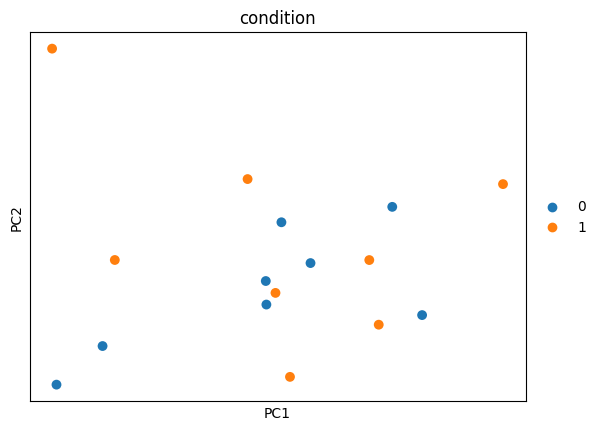

In [15]:
# let's plot PCA
m.sc.tl.pca(dds)
m.sc.pl.pca(dds, color='condition', size=200)

# Perform gene set and pathway enrichment analysis

In [16]:
# first use the DESeq2 results to rank the genes based on the statistic 'stat' and convert genes to upper case
ranking = res[['stat']].dropna().sort_values('stat', ascending=False)
ranking_index=list(ranking.index)
ranking_index_upper=[x.upper() for x in ranking_index]
ranking.index=ranking_index_upper
ranking

,stat
SAG,12.238474
PDZPH1,11.514388
GLMN,10.851328
CPT1A,10.825824
DYRK2,8.504258
...,...
H2BC4,-8.924180
IDE,-9.865319
HSP90AA1,-11.682402
IRF7,-14.629464


In [17]:
# look at the names of the libraries that are available to use for PEA and GSEA
m.gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [18]:
# enable wide-view dataframes (otherwise text gets cut off for the Term column)
m.data_table.enable_dataframe_formatter()

In [19]:
# use enrichR to get gene ontology terms for molecular function, cellular components, and biological processes (GSEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['GO_Molecular_Function_2023','GO_Cellular_Component_2023', 'GO_Biological_Process_2023'],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)


,Term,Genes,Adjusted P-value
0,RNA Binding (GO:0003723),TCERG1;RPL30;DDX46;EIF4A3;HMGB3;NOC2L;WDR46;CC...,0.000001
1,ATP Binding (GO:0005524),SRPK2;HSPA8;HSP90AA1;CDKL5;DYRK2;HSPA5;MAST2;E...,0.029304
2,Adenyl Ribonucleotide Binding (GO:0032559),SRPK2;HSPA8;HSP90AA1;CDKL5;DYRK2;HSPA5;MAST2;E...,0.029304
3,Ubiquitin Protein Ligase Binding (GO:0031625),HSPA8;KDM4A;PACRG;HSP90AA1;SLF2;HSPA5;GLMN;DIO...,0.037340
4,Carboxylic Acid Transmembrane Transporter Acti...,SLC7A5;SLC38A1;SLC6A8;SLC16A6;SLC6A11;SLC16A3;...,0.047008
450,Intracellular Membrane-Bounded Organelle (GO:0...,TCERG1;RPL30;PRDM9;EIF4A3;TESK1;RORB;NOC2L;FAB...,0.000576
451,Nucleus (GO:0005634),TCERG1;RPL30;PRDM9;EIF4A3;TESK1;RORB;NOC2L;FAB...,0.001563
452,Neuron Projection (GO:0043005),PTPRS;CAMK2A;LRP4;FXR1;RBM3;TRIM9;UBB;RACK1;KI...,0.017558
453,Dendrite (GO:0030425),HSPA8;PRNP;CDKL5;BNIP3;SLC4A10;LRP4;FXR1;RBM3;...,0.019000
689,Carboxylic Acid Transport (GO:0046942),SLC7A5;SLC38A1;SLC16A6;SLC6A11;SLC3A2;SLC16A3;...,0.044422


In [20]:
# use enrichR to get enriched pathways from KEGG (PEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['KEGG_2019_Mouse' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,Spliceosome,TCERG1;HSPA8;AQR;HNRNPA3;SF3B3;DDX46;PCBP1;EIF...,0.017953
1,Phototransduction,GUCY2E;RCVRN;GUCA1B;SAG;GUCA1A,0.043526


In [21]:
# use enrichR to get enriched pathways from WikiPathways_2019_Mouse (PEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['WikiPathways_2019_Mouse' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value


In [22]:
#  use enrichR to get enriched pathways from  ARCHS4_Tissues
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['ARCHS4_Tissues' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,RETINA,FHOD3;FRMPD1;PROS1;FRMPD2;PLEKHB1;WWC2;TESK1;G...,8.945550e-08
1,CEREBRAL CORTEX,FHOD3;HSPB6;GRIK5;FRMPD2;PLEKHB1;RORB;CXCL14;R...,2.762881e-04
2,BRAIN (BULK),FHOD3;HSPB6;GRIK5;FRMPD2;PLEKHB1;RORB;DOC2B;RL...,1.736789e-03
3,CINGULATE GYRUS,FHOD3;PTPRS;GRIK5;PLEKHB1;RORB;PRPF19;CXCL14;R...,1.736789e-03
4,PREFRONTAL CORTEX,FHOD3;TCERG1;RORB;VLDLR;LRRC2;RLBP1;PCMTD2;PPP...,1.736789e-03
5,SPINAL CORD,FHOD3;PTPRS;GRIK5;MAST2;FRMPD2;PLEKHB1;DOC2B;R...,7.642631e-03
6,SPINAL CORD (BULK),FHOD3;PTPRS;GRIK5;MAST2;FRMPD2;PLEKHB1;DOC2B;R...,7.642631e-03
7,SUPERIOR FRONTAL GYRUS,FHOD3;HSPB6;GRIK5;FRMPD2;PLEKHB1;TESK1;GUCA1A;...,7.642631e-03
8,NEURONAL EPITHELIUM,FHOD3;TCERG1;SUV39H2;HJURP;HMGB3;UFSP2;RORB;VL...,3.801731e-02


In [23]:
# use enrichR to get enriched pathways Rare_Diseases_AutoRIF_Gene_Lists
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['Rare_Diseases_AutoRIF_Gene_Lists' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,Retinitis pigmentosa,RPGRIP1;BBS1;MKKS;RP1;RCVRN;PRCD;GUCA1A;NPHP4;...,0.039771
1,Pigmentary retinopathy,RPGRIP1;BBS1;MKKS;RP1;RCVRN;PRCD;GUCA1A;NPHP4;...,0.039771


In [24]:
# use enrichR to get enriched pathways  WikiPathways_2019_Mouse
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['Elsevier_Pathway_Collection' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,Genes with Mutations Associated with Retinitis...,RPGRIP1;RP1;RBP3;PRCD;PCARE;GUCA1B;SAG;GUCA1A;...,0.000534
1,Proteins Involved in Retinitis Pigmentosa,SORT1;PRCD;PCARE;GUCA1B;GUCA1A;PRPF8;RLBP1;RPG...,0.000675
2,Protein Folding,HSPA8;HSP90AA1;ST13;HSP90B1,0.037870


In [25]:
# use enrichR to get enriched pathways  RNAseq_Automatic_GEO_Signatures_Mouse_Up
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['RNAseq_Automatic_GEO_Signatures_Mouse_Up' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,Spaceflight Photoreceptor Oxidative Stress-Rel...,PRDM9;ZFP329;FRMPD1;ZFP207;PLEKHB1;WWC2;ZDHHC5...,2.423826e-218
1,Light-Driven Rod Dark Adaptation GSE68470 1,ANKRD33B;KLHL36;HSPB6;GUCA1A;BC034090;CXCL14;R...,3.199896e-29
2,Degeneration Tead Reactive M?ller GSE94534 1,FHOD3;GUCY2E;DYRK2;ANKRD33B;FRMPD1;GUCA1B;GUCA...,2.860344e-21
3,C57Bl 6J Bc027072 Eye GSE63810 1,GNAZ;GUCY2E;MAST2;ZDHHC5;GUCA1B;GUCA1A;RORB;AR...,1.226614e-17
4,Atac-Seq Adult Rods Cones GSE83312 1,SUV39H2;FRMPD1;GUCA1B;WDR20;WDR89;AP2A2;LRRC2;...,3.353981e-14
5,Retinal Light High-Intensity Condition GSE1461...,FHOD3;SUV39H2;DYRK2;NTM;ZDHHC5;GUCA1B;GUCA1A;A...,1.962581e-13
6,Injured Ganglion Rgcs Arid1A GSE147844 1,GUCY2E;GUCA1A;VLDLR;ARR3;FABP12;SLC1A7;PCMTD2;...,4.104326e-11
7,Linking M?ller Glia Degenerative GSE121858 1,FHOD3;NTM;VLDLR;RORB;UQCRH;RLBP1;AQP1;RIMS2;LA...,4.104326e-11
8,Exposed Vehicle Il-1B Vivo GSE127234 1,EIF4A3;DTX1;DDX21;ESPN;HIF1A;HK2;HSP90B1;STIP1...,1.498733e-07
9,Crispr Non-Canonical Nucleosome Baf GSE129846 2,DDX1;ODC1;DDX21;SLC3A2;IDE;NOC2L;PRPF19;SDAD1;...,1.498733e-07


In [26]:
# use enrichR to get enriched pathways  RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(20)

,Term,Genes,Adjusted P-value
0,CrX Retina Knockout GSE61389 down,SUV39H2;ANKRD33B;KLHL36;HSPB6;FRMPD1;GUCA1B;ZD...,6.720620e-37
1,Dgcr8 Cone photoreceptors - Post natal day 60 ...,ANKRD33B;ZFP207;PLEKHB1;ZDHHC5;GUCA1A;VLDLR;FA...,1.464889e-33
2,Mef2d Retina Knockout GSE61389 down,ANKRD33B;PTPRS;ZFP207;PLEKHB1;ZDHHC5;RORB;VLDL...,1.464889e-33
3,Dgcr8 Cone photoreceptors - Post natal day 30 ...,ANKRD33B;ZFP207;PLEKHB1;ZDHHC5;GUCA1A;RORB;VLD...,7.663566e-33
4,Dgcr8 Cone photoreceptors - Post natal day 40 ...,ANKRD33B;ZFP207;PLEKHB1;ZDHHC5;GUCA1A;RORB;VLD...,4.228672e-31
5,ABCA4 Retina knockout GSE63772 down,SUV39H2;ANKRD33B;ZFP329;ZFP207;HJURP;BC034090;...,1.969070e-29
6,DMOG Retina GSE74170 up,ANKRD33B;PTPRS;PLEKHB1;LPCAT1;RORB;VLDLR;RLBP1...,1.989625e-25
7,DGCR8 Cone photoreceptors Knockout GSE58498 up,ANKRD33B;PLEKHB1;ZDHHC5;RORB;VLDLR;ACTB;ACTG1;...,2.187176e-25
8,GFP Retina Expression GSE56473 up,ANKRD33B;FRMPD1;LPCAT1;GUCA1B;GUCA1A;DOC2B;VLD...,1.431995e-24
9,Dgcr8 Cone photoreceptors - Post natal day 90 ...,ANKRD33B;ZFP207;PLEKHB1;RORB;VLDLR;ACTB;PCMTD2...,5.235386e-23
